<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../assets/numpy_1b.png" width = 300>

</details>




In [33]:
import numpy as np
import matplotlib.pyplot as plt
dice_sides = (6)
ammount = 0


dices = np.random.randint(1, dice_sides + 1, 100)

for dice in dices:
    ammount += dice
print(ammount)
print(ammount/100)

354
3.54


Theoretical mean: 3.5
[2.6999999999999997, 3.1299999999999986, 3.545999999999944, 3.491000000000176, 3.490290000000388, 3.495623999977425, 3.5008860996977047]


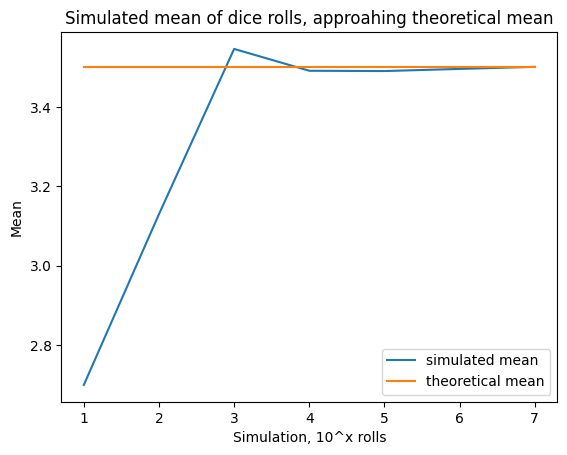

In [162]:
#Andreas code

sets_of_simulations = 7 # amount of sets of die roll simulations, rolls number_of_simulations dice
number_of_simulations = 10 # this is incremented by *10 for each set
sided_die = 6 # what kind of die to be rolled (6 = 6-side sided die etc.)

simulation_number = []

theoretical_mean = sum(range(sided_die + 1)) / sided_die
print(f"Theoretical mean: {theoretical_mean}")

mean_outcome_of_simulations = [0 for set in range(sets_of_simulations)]

for set in range(sets_of_simulations):
    mean_outcome_of_simulations[set] = sum(np.random.randint(1, sided_die + 1, number_of_simulations) / number_of_simulations)
    simulation_number.append(number_of_simulations)
    number_of_simulations *= 10

x = [x + 1 for x in range(sets_of_simulations)]
print(mean_outcome_of_simulations)
plt.plot(x, mean_outcome_of_simulations, label = "simulated mean")
plt.plot(x, [theoretical_mean] * sets_of_simulations, label = "theoretical mean");

plt.legend()

plt.title("Simulated mean of dice rolls, approahing theoretical mean")# name title of graph
plt.xlabel("Simulation, 10^x rolls") # name x-axis
plt.ylabel("Mean"); # name y-axis

--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../assets/numpy2d.png" width = 300>


e) 

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [192]:
#a)
#Setting the numbers in arrays
dice_one = np.arange(1, 7)
dice_two = np.arange(1, 7) 
dice_three = np.arange(1, 7)
dice_four = np.arange(1, 7) 
#Setting the shape
dice_two.shape = (6, 1)
total = dice_one+dice_two+dice_three
print(total)

#b)

count = {i: np.count_nonzero(total == i) for i in range(2, 13)} # counting the outcomes for each number generated

print(type(count))
print(count)

#c)

total_outcomes = 0 # setting var
possible_outcomes = []

for key, value in count.items(): # the total outcomes of all rolls. 
    total_outcomes += value

for key, value in count.items(): # the total outcomes of all rolls. 
    possible_outcomes.append((value/total_outcomes)) # Adds all precenteges to a list, 

amount_eq_1 = 0.0 # new var to see that all possible_outcomes becomes 1

for i in range(len(possible_outcomes)): # check
    amount_eq_1 += possible_outcomes[i]

print(f"All possible outcomes divided by total outcomes = {possible_outcomes}, all added together is: {amount_eq_1}")
print(count.items())


[[ 3  5  7  9 11 13]
 [ 4  6  8 10 12 14]
 [ 5  7  9 11 13 15]
 [ 6  8 10 12 14 16]
 [ 7  9 11 13 15 17]
 [ 8 10 12 14 16 18]]
<class 'dict'>
{2: 0, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3}
All possible outcomes divided by total outcomes = [0.0, 0.041666666666666664, 0.041666666666666664, 0.08333333333333333, 0.08333333333333333, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], all added together is: 1.0
dict_items([(2, 0), (3, 1), (4, 1), (5, 2), (6, 2), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3)])


In [ ]:
dice_one = np.arange(1, 7)
dice_two = np.arange(1, 7) 
dice_three = np.arange(1, 7)
dice_four = np.arange(1, 7) 

dice_four

In [ ]:
for i in range(13):
    possible_outcomes /= total_outcomes

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

In [206]:
import numpy as np

# a) 

x = np.linspace(-1, 1, 50)

print(x)
distance = np.linalg.norm(x)

print(distance)

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
4.164965639175215


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---